<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acct_type           14337 non-null  object 
 1   approx_payout_date  14337 non-null  int64  
 2   body_length         14337 non-null  int64  
 3   channels            14337 non-null  int64  
 4   country             14256 non-null  object 
 5   currency            14337 non-null  object 
 6   delivery_method     14321 non-null  float64
 7   description         14337 non-null  object 
 8   email_domain        14337 non-null  object 
 9   event_created       14337 non-null  int64  
 10  event_end           14337 non-null  int64  
 11  event_published     14238 non-null  float64
 12  event_start         14337 non-null  int64  
 13  fb_published        14337 non-null  int64  
 14  gts                 14337 non-null  float64
 15  has_analytics       14337 non-null  int64  
 16  has_

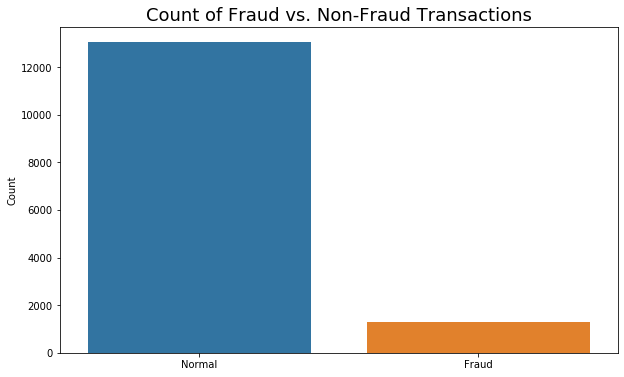

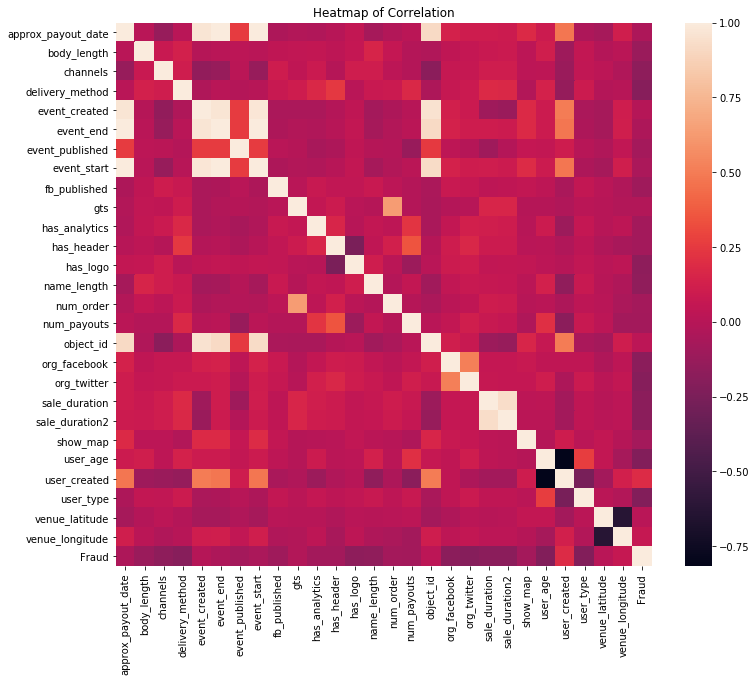

In [1]:
%run fraud_EDA.ipynb

In [2]:
from src.data_cleaner import *
from src.model import *

In [3]:
new_data = clean_data(fraud_data)

In [15]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

In [5]:
categorical_feat_mask = new_data.dtypes==object

categorical_cols = new_data.columns[categorical_feat_mask].tolist()
new_data = new_data.drop(columns = categorical_cols)

In [21]:
X = new_data.drop(columns='Fraud')
y = new_data['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20)


models = []

models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('CatBoost', CatBoostClassifier()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = 'roc_auc')
    results.append(cv_results)
    names.append(name)
    output = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(output)

LR: 0.873518 (0.021990)
DT: 0.888278 (0.025387)
kNN: 0.898490 (0.019904)
RF: 0.981776 (0.008642)
Learning rate set to 0.027913
0:	learn: 0.6398487	total: 64.4ms	remaining: 1m 4s
1:	learn: 0.5899409	total: 76.4ms	remaining: 38.1s
2:	learn: 0.5459044	total: 85.6ms	remaining: 28.5s
3:	learn: 0.5056391	total: 94.7ms	remaining: 23.6s
4:	learn: 0.4674838	total: 105ms	remaining: 20.8s
5:	learn: 0.4345808	total: 116ms	remaining: 19.2s
6:	learn: 0.4039621	total: 126ms	remaining: 17.9s
7:	learn: 0.3752937	total: 135ms	remaining: 16.8s
8:	learn: 0.3532314	total: 145ms	remaining: 16s
9:	learn: 0.3299423	total: 156ms	remaining: 15.5s
10:	learn: 0.3105787	total: 167ms	remaining: 15s
11:	learn: 0.2943829	total: 177ms	remaining: 14.6s
12:	learn: 0.2773905	total: 189ms	remaining: 14.4s
13:	learn: 0.2624525	total: 205ms	remaining: 14.5s
14:	learn: 0.2485966	total: 216ms	remaining: 14.2s
15:	learn: 0.2371263	total: 226ms	remaining: 13.9s
16:	learn: 0.2263110	total: 236ms	remaining: 13.6s
17:	learn: 0.215

In [7]:
# import json

# with open('data/test_script_examples.json') as f:
#   data = json.load(f)


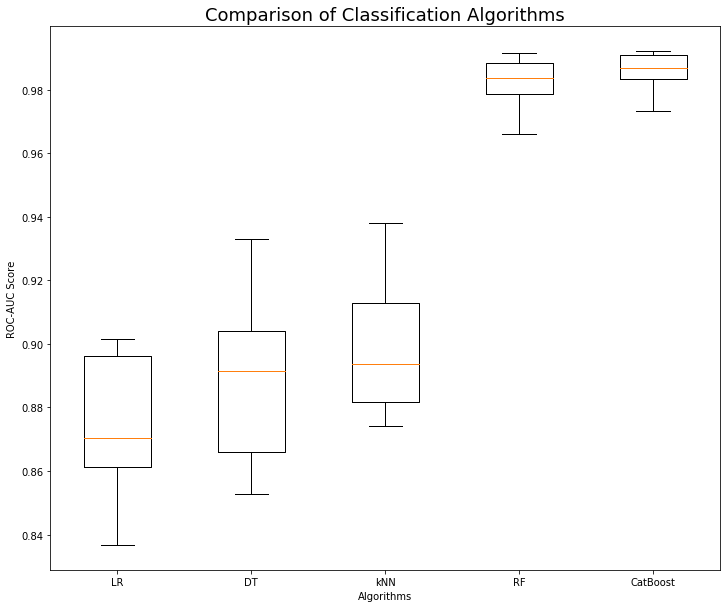

In [23]:
fig, ax = plt.subplots(figsize=(12,10))
plt.title('Comparison of Classification Algorithms', fontsize=18)
plt.xlabel('Algorithms')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()